In [ ]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)
from scipy.signal import detrend
%load_ext autoreload
%autoreload 2

In [63]:
# gen pickled heads
Sequence=3
for i in range(1,16):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(Sequence,i)
    head.full_filter()
    head.save()

1
depth filter done.
dangling removal done
color filter done.
2
depth filter done.
dangling removal done
color filter done.
3
depth filter done.
dangling removal done
color filter done.
4
depth filter done.
dangling removal done
color filter done.
5
depth filter done.
dangling removal done
color filter done.
6
depth filter done.
dangling removal done
color filter done.
7
depth filter done.
dangling removal done
color filter done.
8
depth filter done.
dangling removal done
color filter done.
9
depth filter done.
dangling removal done
color filter done.
10
depth filter done.
dangling removal done
color filter done.
11
depth filter done.
dangling removal done
color filter done.
12
depth filter done.
dangling removal done
color filter done.
13
depth filter done.
dangling removal done
color filter done.
14
depth filter done.
dangling removal done
color filter done.
15
depth filter done.
dangling removal done
color filter done.


In [64]:
# load heads
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(Sequence,i) for i in range (1,16)]

In [65]:
# make head from first to last
def make_mhead(all_heads, first, last):
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()   
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.links.append(multi_head.Link(left=all_heads[first+1].frame_id,right=all_heads[first].frame_id))
    for i in range(first+2,last+1):
        heads.links.append(multi_head.Link(left=all_heads[i].frame_id,right=all_heads[i-1].frame_id))
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()
        heads.append(all_heads[i])        
        if i==last:
             heads.links.append(multi_head.Link(left=all_heads[first].frame_id,right=all_heads[i].frame_id))
    print ("completed")
    return heads

mhead = make_mhead(all_heads, 0, 14)
mhead.calc_keypoints()

completed


In [66]:
def calc_connections(mhead):
    for link in mhead.links:
        link.reset()
        mhead.ransac_from_link(link)        
calc_connections(mhead)

C:\Data Science\Advanced Vision\Coursework\AV_CW\SIFT.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  err = np.sqrt(np.var(dist) / (np.sum(inliers) - min_num_inliers))


In [70]:
mhead.reset_all_head_positions()
foo= mhead.transform_from_link(mhead.links[0])
foo= mhead.transform_from_link(mhead.links[1])
foo= mhead.transform_from_link(mhead.links[2])
foo= mhead.transform_from_link(mhead.links[-1])
foo= mhead.transform_from_link(mhead.links[-2])
mhead.save()

Saving Completed


In [74]:
link_index,err=mhead.get_next_unpositioned_link()
while(link_index):
    mhead.links[link_index].print_short()
    foo= mhead.transform_from_link(mhead.links[link_index])
    link_index,err=mhead.get_next_unpositioned_link()

any_head_positioned True
5-4, Count=144, Err=0.0047
any_head_positioned True
6-5, Count=101, Err=0.0046
any_head_positioned True
14-13, Count=57, Err=0.0073
any_head_positioned True
13-12, Count=88, Err=0.0052
any_head_positioned True
12-11, Count=55, Err=0.0070
any_head_positioned True
7-6, Count=71, Err=0.0083
any_head_positioned True
11-10, Count=43, Err=0.0099
any_head_positioned True
10-9, Count=41, Err=0.0088
any_head_positioned True
9-8, Count=31, Err=0.0068
any_head_positioned True


In [75]:
mhead.create_spheres(0.2)

In [76]:
mhead.create_mesh()


completed


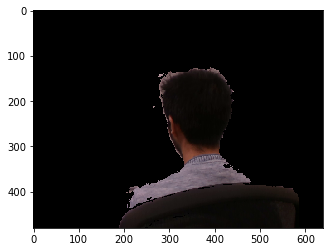

In [34]:
img= mhead.heads[8].get_filtered_image()
plt.imshow(img)

In [53]:
linkindex=6
mhead.reset_all_head_positions()
foo= mhead.transform_from_link(mhead.links[linkindex])
mhead.links[linkindex].print_short()
mhead.create_spheres(0.4)

8-7, Count=192, Err=0.0032
